# Dateexploration

## Visualization of Raw Data and Synthetic Data

In [31]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import torch

import mlflow
from config.loader import load_config
import os

import src.measurements.api as mpi
import src.generator.api as gpi
import src.peaks.api as ppi
import src.statistics.api as spi



In [ ]:
# Load first 1246 Synthetic data
synthetic_keys = gpi.API().unique_keys()[0:1247]
synthetics = gpi.API().synthetics(keys=synthetic_keys)

# Load Real Measuremnt Data
dates = mpi.API().unique_dates()
measurement = mpi.API().measurement(dates=dates)

processed_measurements = ppi.API().measurement(dates=dates)

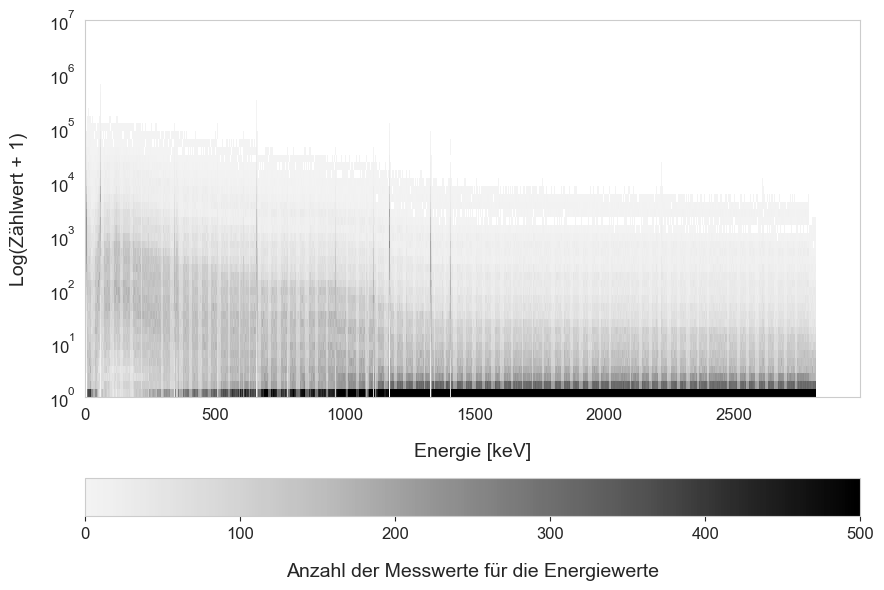

In [3]:
# Visualize the Distribution of count over this 1246 Synthetic Measurements
plt.figure(figsize=(10, 7))
synthetics["count_shifted"] = synthetics["count"] + 1

cmap = mpl.colormaps['Greys']
new_cmap = cmap(np.linspace(0.1, 1, 256))
custom_cmap = mpl.colors.ListedColormap(new_cmap)

ax = sns.histplot(
    synthetics,
    x="energy",
    y="count_shifted",
    bins=(2988, 40),
    log_scale=(False, True),
    cbar=True,
    cbar_kws={
        "orientation": "horizontal",
        "shrink": 1,
        "label": "Anzahl der Messwerte für die Energiewerte",
    },
    cmap=custom_cmap,
    vmax=500,
    zorder=-10,
    # rasterized=True
)
cbar = ax.figure.axes[-1]
cbar.xaxis.label.set_size(14)
cbar.xaxis.labelpad = 15
cbar.tick_params(labelsize=12)
ax.set_rasterization_zorder(0)
plt.xlabel("Energie [keV]", size=14, labelpad=15)
plt.ylabel("Log(Zählwert + 1)", size=14, labelpad=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylim(1, 10000000)
plt.xlim(0, 2988)
plt.grid(False)
plt.savefig("plots\\count_energy_heatmap_synthetics.svg", format="svg")
plt.show()
plt.close()

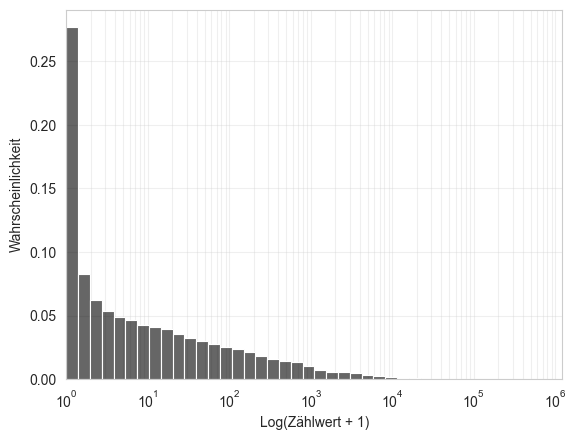

In [4]:
import src.generator.api as gpi
import seaborn as sns
import matplotlib.pyplot as plt

counts = synthetics["count"].to_numpy() + 1

sns.histplot(
    counts,
    bins=40,
    stat="probability",
    color="black",
    alpha=0.6,
    label="Data",
    log_scale=(True, False),
)
plt.xlabel("Log(Zählwert + 1)")
plt.ylabel("Wahrscheinlichkeit")
plt.grid(True, alpha=0.3, which="both")
plt.xlim(
    1,
)
plt.savefig("plots\\count_histogram.svg")
plt.show()
plt.close()

In [8]:
synthetics.describe().apply(lambda s: s.apply("{0:.5f}".format))

,energy,count,background,total_confidence,matched,confidence,identified_peak,count_shifted
count,8176320.00000,8176320.00000,8176320.00000,8176320.00000,8176320.00000,8176320.00000,8176320.00000,8176320.00000
mean,1407.72586,253.22410,210.55346,0.00007,0.00006,0.00040,0.26918,254.22410
std,812.85055,2347.11803,1631.60850,0.00379,0.00361,0.02165,17.11011,2347.11803
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25%,703.86250,0.29088,0.29000,0.00000,0.00000,0.00000,0.00000,1.29088
50%,1407.72500,3.49754,3.42000,0.00000,0.00000,0.00000,0.00000,4.49754
75%,2111.58750,33.28930,31.47000,0.00000,0.00000,0.00000,0.00000,34.28930
max,2815.45000,627106.74395,126861.75000,1.00000,1.00000,19.86000,1407.75000,627107.74395


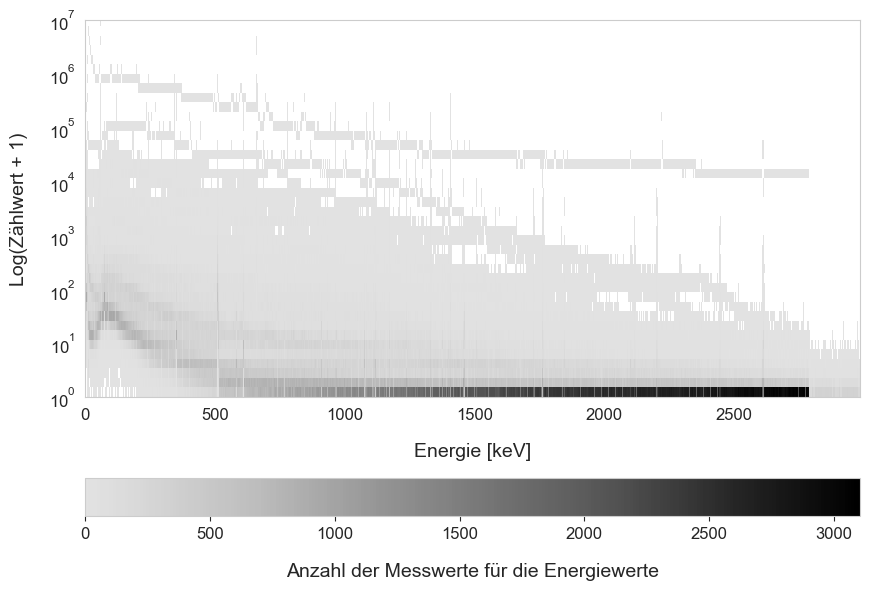

In [5]:
# Visualize real measuremnt data
cmap = mpl.colormaps['Greys']
new_cmap = cmap(np.linspace(0.2, 1, 256))
custom_cmap = mpl.colors.ListedColormap(new_cmap)

plt.figure(figsize=(10, 7))
measurement["count_shifted"] = measurement["count"] + 1
ax = sns.histplot(
    measurement,
    x="energy",
    y="count_shifted",
    bins=(2988, 40),
    log_scale=(False, True),
    cbar=True,
    cbar_kws={
        "orientation": "horizontal",
        "shrink": 1,
        "label": "Anzahl der Messwerte für die Energiewerte",
    },
    cmap=custom_cmap,
    zorder=-10,
    # rasterized=True
)
cbar = ax.figure.axes[-1]
cbar.xaxis.label.set_size(14)
cbar.xaxis.labelpad = 15
cbar.tick_params(labelsize=12)
ax.set_rasterization_zorder(0)
plt.xlabel("Energie [keV]", size=14, labelpad=15)
plt.ylabel("Log(Zählwert + 1)", size=14, labelpad=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylim(1, 10000000)
plt.xlim(0, 2988)
plt.grid(False)
plt.savefig("plots\\count_energy_heatmap_measurements.svg", format="svg")
plt.show()
plt.close()

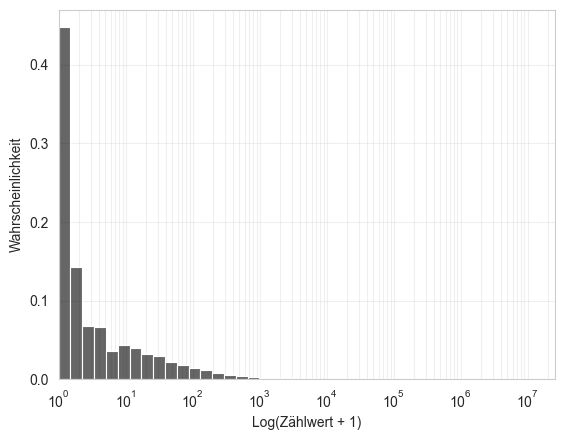

In [6]:
plt.close()
import src.generator.api as gpi
import seaborn as sns
import matplotlib.pyplot as plt

counts = measurement["count"].to_numpy() + 1

sns.histplot(
    counts,
    bins=40,
    stat="probability",
    color="black",
    alpha=0.6,
    label="Data",
    log_scale=(True, False),
)
plt.xlabel("Log(Zählwert + 1)")
plt.ylabel("Wahrscheinlichkeit")
plt.grid(True, alpha=0.3, which="both")
plt.xlim(
    1,
)
plt.savefig("plots\\count_histogram.svg")
plt.show()
plt.close()

In [7]:
print(len(dates))
measurement.describe().apply(lambda s: s.apply("{0:.5f}".format))

1246


,datetime,energy,count,count_shifted
count,10167360.00000,10167360.00000,10167360.00000,10167360.00000
mean,.5f,1407.26332,235.21555,236.21555
min,.5f,-1.14000,0.00000,1.00000
25%,.5f,702.80000,0.00000,1.00000
50%,.5f,1406.30000,1.00000,2.00000
75%,.5f,2109.59000,6.00000,7.00000
max,.5f,2987.80000,11275109.00000,11275110.00000
std,nan,814.07168,14813.72115,14813.72115


In [9]:
measurement_diffs = (
    measurement.sort_values(by="energy").groupby("datetime").diff().dropna()
)
measurement_diffs["energy"] = measurement_diffs["energy"].round(2)
measurement_diffs = measurement_diffs.join(
    measurement, lsuffix="_diffs", rsuffix="_raw", how="left"
)
diffs = measurement_diffs.groupby("energy_diffs").count().reset_index()
diffs["percent"] = diffs["count_diffs"] / diffs["count_diffs"].sum() * 100

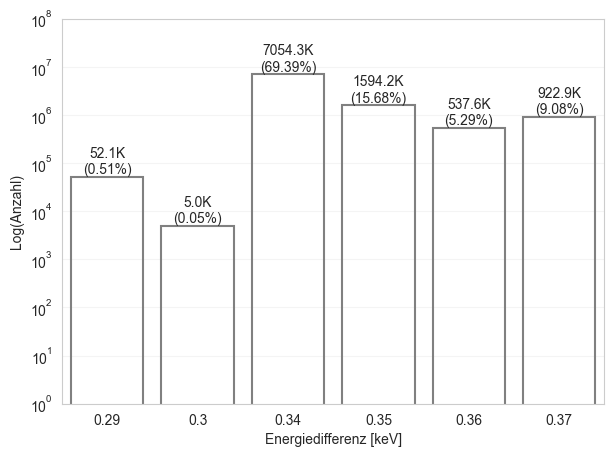

In [10]:
# Plotting the differences of the energies, to analyse the x-axis for every measurement.

plt.rcParams["svg.fonttype"] = "none"
fig = plt.figure(figsize=(7, 5))
ax = sns.barplot(
    diffs,
    x="energy_diffs",
    y="count_diffs",
    color="grey",
    linewidth=1.5,
    edgecolor=".5",
    facecolor=(0, 0, 0, 0),
)
labels = [
    f"{c / 1e3:.1f}K\n({p:.2f}%)"
    for c, p in zip(diffs["count_diffs"], diffs["percent"])
]
ax.bar_label(ax.containers[0], labels=labels, fontsize=10)
# plt.title("Untersuchung der Energiewerte")
plt.xlabel("Energiedifferenz [keV]")
plt.ylabel("Log(Anzahl)")
plt.grid(axis="y", alpha=0.2)
plt.yscale("log")
plt.ylim(1, 100000000)
plt.savefig("plots\\energy_diffs.svg")
plt.show()
plt.close()

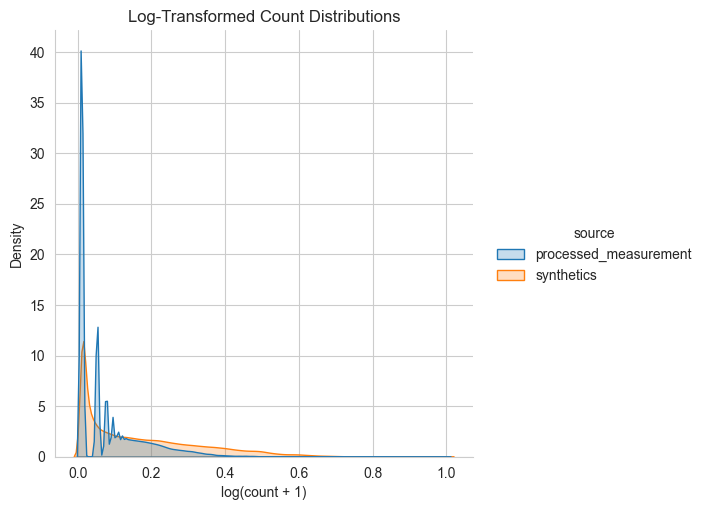

KstestResult(statistic=np.float64(0.4475018163873682), pvalue=np.float64(0.0), statistic_location=np.float64(0.01), statistic_sign=np.int8(1))
[4549973       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0 1446400
       0       0       0       0       0       0       0       0       0
  688724       0       0       0       0       0       0  402016       0
       0       0       0  268180       0       0       0       0  200578
       0       0  160387       0       0       0  135045       0       0
  116220       0  102307       0       0   91535       0   82632       0
   74971       0   68242   63120       0   58251   54436       0   49913
   47064   43548   41115       0   38659   36410   34374   32182   30602
   29029   54217   24846   23754   22839   42026   19475   36808   17229
   31771   15060   28083   25815   23829   22009   20492   19046   18156
   17243   23872   15152   21514   20316   12788   181

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.2435129740518962

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Log-transform the counts
sample1 = np.log(measurement["count"].to_numpy() + 1).reshape(-1, 1)
sample2 = np.log(synthetics["count"].to_numpy() + 1).reshape(-1, 1)

# Min-Max-Skalierung auf [0,1]
scaler1 = MinMaxScaler(feature_range=(0.01, 1.0))  # min nicht 0, da Pareto >0 sein muss
scaler2 = MinMaxScaler(feature_range=(0.01, 1.0))

sample1_scaled = scaler1.fit_transform(sample1).flatten()
sample2_scaled = scaler2.fit_transform(sample2).flatten()

# Combine into a DataFrame
df = pd.DataFrame({
    "log_count": np.concatenate([sample1_scaled, sample2_scaled]),
    "source": ["processed_measurement"] * len(sample1_scaled) + ["synthetics"] * len(sample2_scaled)
})

# Plot with seaborn
sns.displot(df, x="log_count", hue="source", kind="kde", fill=True, common_norm=False)
plt.title("Log-Transformed Count Distributions")
plt.xlabel("log(count + 1)")
plt.ylabel("Density")
plt.show()

import numpy as np
from scipy import stats

print(stats.ks_2samp(sample1_scaled, sample2_scaled))

from scipy.stats import chisquare

# Histogram (same bins)
counts1, bins = np.histogram(sample1_scaled, bins=400)
counts2, _ = np.histogram(sample2_scaled, bins=bins)

print(counts1, counts2)

# Chi-squared test
chi2_stat, p_value = chisquare(counts1, f_exp=counts2)
print(chi2_stat)
print(p_value)



In [13]:
from scipy.stats import pareto
import numpy as np

# Log-transform the counts
sample1 = np.log(measurement["count"].to_numpy() + 1).reshape(-1, 1)
sample2 = np.log(synthetics["count"].to_numpy() + 1).reshape(-1, 1)

# Min-Max-Skalierung auf [0,1]
scaler1 = MinMaxScaler(feature_range=(0.01, 1.0))  # min nicht 0, da Pareto >0 sein muss
scaler2 = MinMaxScaler(feature_range=(0.01, 1.0))

sample1_scaled = scaler1.fit_transform(sample1).flatten()
sample2_scaled = scaler2.fit_transform(sample2).flatten()

# Fit Pareto to data1 and data2
params1 = pareto.fit(sample1_scaled, floc=0)
print(min(sample1_scaled), max(sample1_scaled))
params2 = pareto.fit(sample2_scaled, floc=0)
print(min(sample2_scaled), max(sample2_scaled))

print(f"Sample 1 Pareto params: shape={params1[0]:.3f}, loc={params1[1]:.3f}, scale={params1[2]:.3f}")
print(f"Sample 2 Pareto params: shape={params2[0]:.3f}, loc={params2[1]:.3f}, scale={params2[2]:.3f}")

0.01 1.0
0.01 1.0
Sample 1 Pareto params: shape=0.735, loc=0.000, scale=0.010
Sample 2 Pareto params: shape=0.452, loc=0.000, scale=0.010


KstestResult(statistic=np.float64(0.375), pvalue=np.float64(5.529756080361251e-63), statistic_location=np.float64(0.056244989002998194), statistic_sign=np.int8(1))


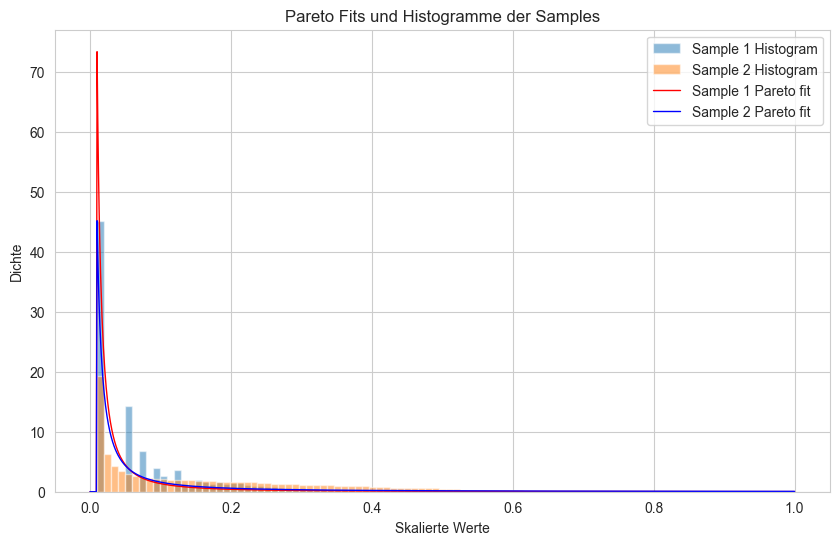

In [17]:
# x-Achse für den Plot: Werte von minimalem bis maximalem Wert aller Samples
x = np.linspace(0, max(np.max(sample1_scaled), np.max(sample2_scaled)), 1000)

# PDF der gefitteten Pareto-Verteilungen berechnen
pdf1 = pareto.pdf(x, *params1)
pdf2 = pareto.pdf(x, *params2)

print(stats.ks_2samp(pdf1, pdf2))

plt.figure(figsize=(10, 6))
plt.hist(sample1_scaled, bins=100, density=True, alpha=0.5, label="Sample 1 Histogram")
plt.hist(sample2_scaled, bins=100, density=True, alpha=0.5, label="Sample 2 Histogram")
plt.plot(x, pdf1, 'r-', lw=1, label='Sample 1 Pareto fit')
plt.plot(x, pdf2, 'b-', lw=1, label='Sample 2 Pareto fit')
plt.title("Pareto Fits und Histogramme der Samples")
plt.xlabel("Skalierte Werte")
plt.ylabel("Dichte")
plt.legend()
plt.show()

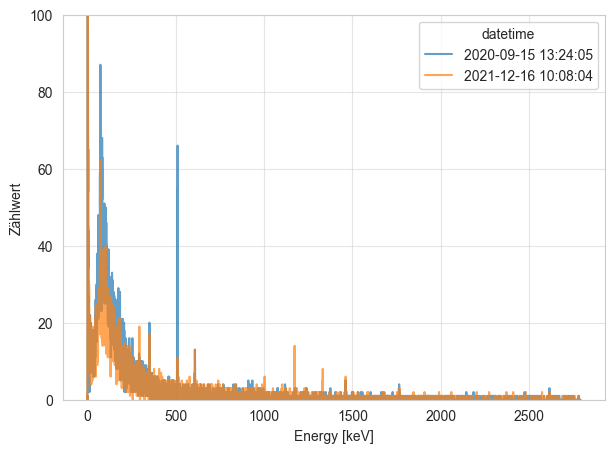

In [18]:
one_measurement = measurement.loc[measurement["datetime"].isin(dates[6:8])]

plt.figure(figsize=(7, 5))
sns.lineplot(one_measurement, x="energy", y="count", hue="datetime", alpha=0.7)

plt.ylim(0, 100)
plt.xlabel("Energy [keV]")
plt.ylabel("Zählwert")
plt.grid(alpha=0.5)
plt.savefig("plots\\measurement_example.svg")
plt.show()
plt.close()

In [27]:
# EXAMPLE
os.environ["AWS_ACCESS_KEY_ID"] = load_config()["minio"]["AWS_ACCESS_KEY_ID"]
os.environ["AWS_SECRET_ACCESS_KEY"] = load_config()["minio"]["AWS_SECRET_ACCESS_KEY"]
os.environ["MLFLOW_S3_ENDPOINT_URL"] = load_config()["minio"]["MLFLOW_S3_ENDPOINT_URL"]
model_name = "VAE_CPU"
model_version = "latest"
mlflow.set_tracking_uri(uri=load_config()["mlflow"]["uri"])


C:\Users\VID\AppData\Local\Temp\ipykernel_23588\746477738.py:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  run_id = client.get_latest_versions("CNN_CPU")[0].run_id


<Axes: xlabel='timestamp', ylabel='value'>

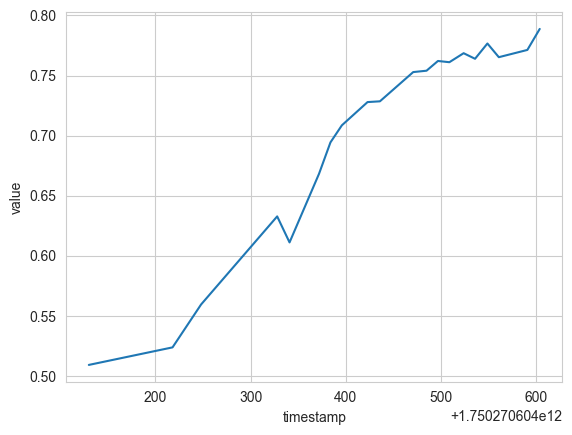

In [30]:
# EXAMPLE
client = mlflow.tracking.MlflowClient(tracking_uri=load_config()["mlflow"]["uri"])
run_id = client.get_latest_versions("VAE_CPU")[0].run_id
run = client.get_run(run_id)
losses = client.get_metric_history(run_id, "training_loss")
losses = pd.DataFrame([{"step": m.step, "value": m.value, "timestamp": m.timestamp} for m in losses])
sns.lineplot(losses, x="timestamp", y="value")

In [32]:
isotope_per_pm = spi.API().view_isotope_per_pm()
pm_isotopes_found = spi.API().view_pm_isotopes_found()
isotopes_greater_one = isotope_per_pm.loc[isotope_per_pm["row_count"] > 1]
isotopes_equal_one = isotope_per_pm.loc[isotope_per_pm["row_count"] == 1]
print(len(isotopes_greater_one), len(isotopes_equal_one))

In [38]:
isotope_per_pm.groupby("row_count").count().reset_index()  # Number of Nuclides Found

,row_count,datetime
0,1,200
1,2,213
2,3,366
3,4,267
4,5,156
5,6,40
6,7,3
7,8,1


In [190]:
latent_space_data = spi.API().processed_synthetics_latent_space()
try:
    latent_space_data = latent_space_data.drop(columns=["cluster"])
except:
    pass

X = latent_space_data.drop(columns=["datetime", "datetime_from_measurement"]).to_numpy()
kmeans = KMeans(n_clusters=5, random_state=42)
latent_space_data["cluster"] = kmeans.fit_predict(X)


[0.08703152 0.08521563 0.08362315 0.07770066 0.07665743 0.07425896
 0.0737804  0.06786163 0.06568638 0.06509972]


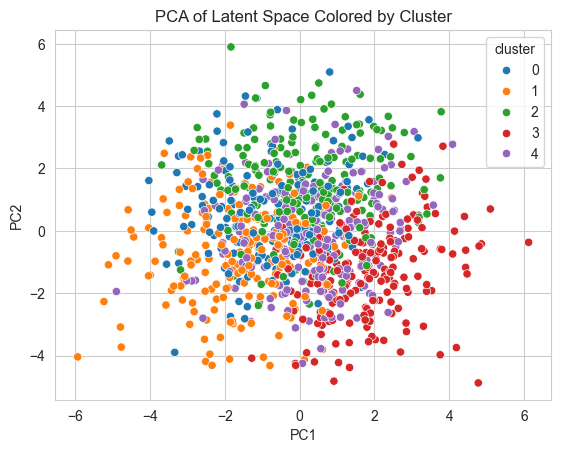

In [192]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
latent_space_data["PC1"] = X_pca[:, 0]
latent_space_data["PC2"] = X_pca[:, 1]

sns.scatterplot(data=latent_space_data, x="PC1", y="PC2", hue="cluster", palette="tab10")
plt.title("PCA of Latent Space Colored by Cluster")
plt.show()

# co_occurrence = latent_space_data[isotopes].T @ latent_space_data[isotopes]
# sns.heatmap(co_occurrence, annot=True, cmap="Blues")
# plt.title("Isotope Co-Occurrence Matrix")
# plt.show()


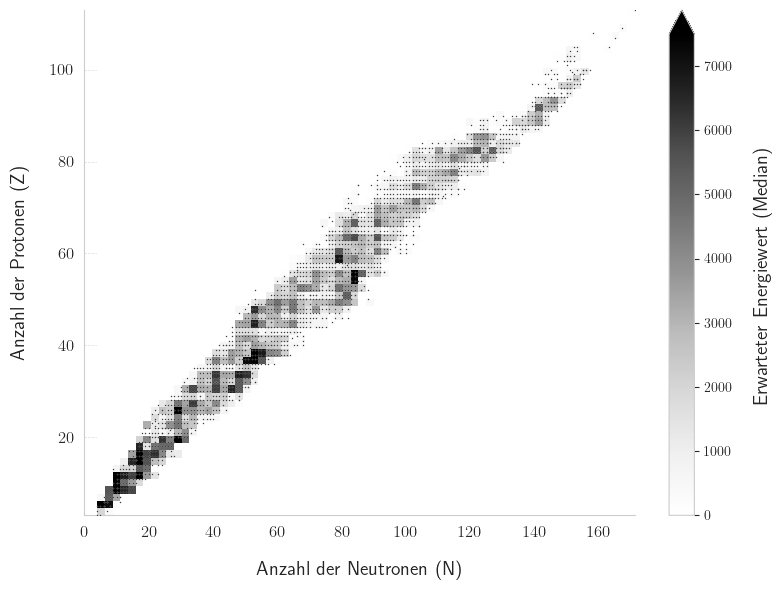

In [194]:
import src.nuclide.api as npi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['text.usetex'] = True
nuclides = npi.API().all_nuclides()
unique_nuclides = nuclides.groupby("nuclide_id").median(numeric_only=True).reset_index()
data = unique_nuclides[["energy", "d_n", "d_z"]]
x = data["d_n"].to_numpy()
y = data["d_z"].to_numpy()
energy = data["energy"].to_numpy()
bins = 70
heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=energy)
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, s=1, color=sns.color_palette("dark")[7], ax=ax, zorder=50, edgecolor='lightgrey')
pcm = ax.pcolormesh(xedges, yedges, heatmap.T, cmap="Greys", shading='flat', vmin=0, vmax=7500)
cbar = plt.colorbar(pcm, ax=ax, extend="max")
cbar.set_label("Erwarteter Energiewert (Median)", size=14, labelpad=15)
ax.set_xlabel("Anzahl der Neutronen (N)", size=14, labelpad=15)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlim(0)
ax.set_xlim(0)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel("Anzahl der Protonen (Z)", size=14, labelpad=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("plots\\nuclide_map_estimated_energies.pdf")
plt.show()



In [195]:
data = mpi.API().measurement(["2017-08-30 09:45:35"])

C:\Users\VID\AppData\Local\Temp\ipykernel_23588\3535792624.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axin.set_yticklabels(["", "", "2000", "", "4000", ""])
C:\Users\VID\AppData\Local\Temp\ipykernel_23588\3535792624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axin.set_xticklabels(["", "1170", "1175", ""])


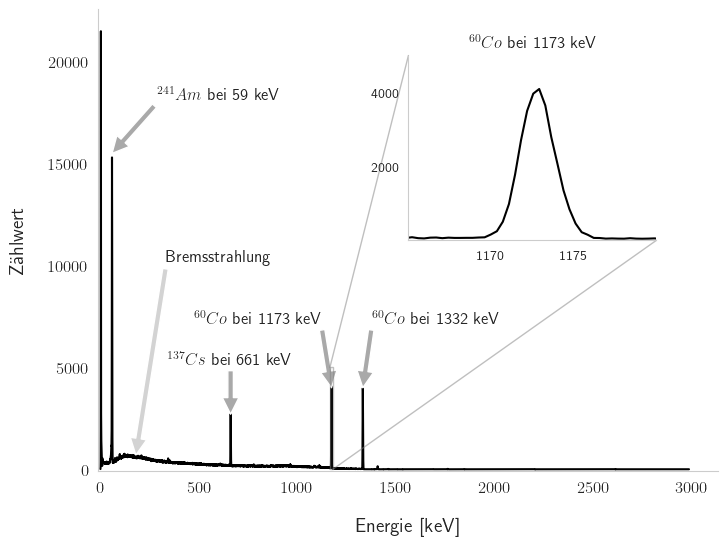

In [196]:
import matplotlib.pyplot as plt
import src.measurements.api as mpi

plt.rcParams['text.usetex'] = True
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

data = mpi.API().measurement(["2017-08-30 09:45:35"])
data = data.loc[data["energy"] > 0]
fig, ax = plt.subplots(figsize=(8, 6))

x1 = data["energy"]
x2 = data["count"]

ax.plot(x1, x2, color="black")

axin = ax.inset_axes([0.5, 0.5, 0.4, 0.4])

axin.set_xlim(1165, 1180)
axin.set_ylim(0, 5000)

axin.plot(x1, x2, color="black")
axin.set_xticks([], minor=True)
axin.set_yticklabels(["", "", "2000", "", "4000", ""])
axin.set_xticklabels(["", "1170", "1175", ""])

ax.set_xlim(-10)
ax.set_ylim(-100)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.annotate('$^{60}Co$ bei 1173 keV',
             ha='center', va='bottom',
             size='large',
             xytext=(800, 7000), xy=(1173, 4000), arrowprops={'facecolor': 'darkgrey'})

plt.annotate('$^{60}Co$ bei 1332 keV',
             ha='center', va='bottom',
             size='large',
             xytext=(1700, 7000), xy=(1332, 4000), arrowprops={'facecolor': 'darkgrey'})

plt.annotate('$^{137}Cs$ bei 661 keV',
             ha='center', va='bottom',
             size='large',
             xytext=(661, 5000), xy=(661, 2700), arrowprops={'facecolor': 'darkgrey'})

plt.annotate('Bremsstrahlung',
             size='large',
             ha='center', va='bottom',
             xytext=(600, 10000), xy=(180, 700), arrowprops={'facecolor': 'lightgrey'})

plt.annotate('$^{241}Am$ bei 59 keV',
             ha='center', va='bottom',
             size='large',
             xytext=(600, 18000), xy=(59, 15500), arrowprops={'facecolor': 'darkgrey'})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

axin.spines['top'].set_visible(False)
axin.spines['right'].set_visible(False)
axin.set_title("$^{60}Co$ bei 1173 keV")

ax.indicate_inset_zoom(axin)

axin.grid(False)
plt.grid(False)
plt.xlabel("Energie [keV]", size=14, labelpad=15)
plt.ylabel("Zählwert", size=14, labelpad=15)
plt.savefig("plots/example_for_gammaspectroscopy.pdf")
plt.show()

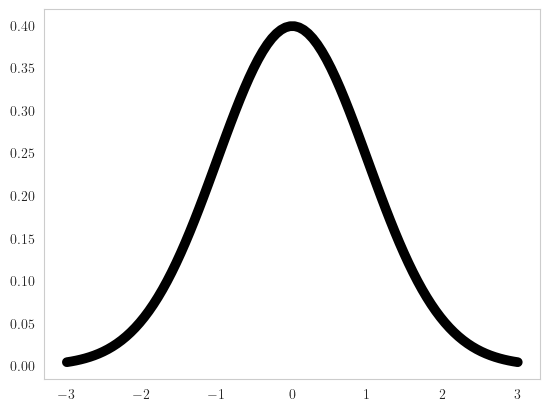

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="black", linewidth=7.0)

plt.grid(False)
plt.savefig("plots/normal_dist.svg", transparent=True)

In [2]:
import mlflow
import os
from config.loader import load_config

os.environ["AWS_ACCESS_KEY_ID"] = load_config()["minio"]["AWS_ACCESS_KEY_ID"]
os.environ["AWS_SECRET_ACCESS_KEY"] = load_config()["minio"]["AWS_SECRET_ACCESS_KEY"]
os.environ["MLFLOW_S3_ENDPOINT_URL"] = load_config()["minio"]["MLFLOW_S3_ENDPOINT_URL"]
model_uri = load_config()["mlflow"]["uri"]
model_name = "CNN_CPU"
model_version = "latest"
mlflow.set_tracking_uri(uri=model_uri)
model = mlflow.pytorch.load_model(f"models:/{model_name}/{model_version}").to("cpu")

C:\Users\VID\Desktop\GitHub\nuclide-identification\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from src.cnn.training import Training

training_obj = Training(use_processed_synthetics=False, use_processed_measuremnets=False)

In [4]:
validation_cnn_pm_loader = training_obj.validation_cnn_pm_loader

In [133]:
for i in validation_cnn_pm_loader:
    x_data = i[0][1].float().to("cpu").unsqueeze(0).unsqueeze(0)
    y_data = i[2][1].float().squeeze(1).to("cpu")

In [6]:
x_data = i[0][4].float().to("cpu").unsqueeze(0).unsqueeze(0)
y_data = i[2][4].float().squeeze(1).to("cpu")
datetime = i[1][4]

print(x_data[0][0])
print(datetime)
print(y_data)


tensor([0., 0., 0.,  ..., 0., 0., 0.])
2020-09-23 15:25:25
tensor([[0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.]])


In [7]:
x_data.squeeze(0).detach().cpu().numpy().T
y_data.squeeze(0).detach().cpu().numpy().T

array([0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

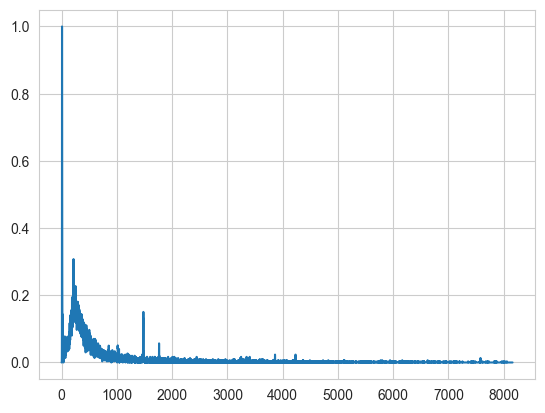

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, len(x_data.squeeze(0).detach().cpu().numpy().T), 1), x_data.squeeze(0).detach().cpu().numpy().T)

In [9]:
import torch

model.eval()
outputs = model(x_data)
simg_outsputs = torch.sigmoid(outputs)
simg_outsputs

tensor([[0.0575, 0.3464, 0.0422, 0.5055, 0.4166, 0.5061, 0.1247, 0.8145, 0.0267,
         0.0628, 0.0413]], grad_fn=<SigmoidBackward0>)

In [165]:
import torch

# Dictionary to store all outputs
layer_outputs = {}


# Hook function to capture outputs
def get_activation(name):
    def hook(model, input, output):
        layer_outputs[name] = output.detach().cpu().numpy()  # convert to numpy for inspection

    return hook


# Register hooks on all modules
for name, module in model.named_modules():
    if not isinstance(module, torch.nn.Sequential) and name != "":
        module.register_forward_hook(get_activation(name))

# Run your model on some input
with torch.no_grad():
    _ = model(x_data)

# Print or access all outputs
for name, output in layer_outputs.items():
    print(f"\nLayer: {name}")
    print(output.shape)
    # print(output)  # This prints the actual values (can be large!)


Layer: conv1
(1, 1020, 8156)

Layer: bn1
(1, 1020, 8156)

Layer: pool1
(1, 1020, 4078)

Layer: conv2
(1, 510, 4074)

Layer: bn2
(1, 510, 4074)

Layer: pool2
(1, 510, 2037)

Layer: conv3
(1, 205, 2033)

Layer: bn3
(1, 205, 2033)

Layer: pool3
(1, 205, 1)

Layer: fc1
(1, 510)

Layer: dropout
(1, 510)

Layer: fc2
(1, 11)


In [12]:
layer_outputs["pool3"][0]

array([[1.58125997e-01],
       [3.51883247e-02],
       [8.18164274e-02],
       [1.47812694e-01],
       [1.45270944e-01],
       [9.38529223e-02],
       [8.61533210e-02],
       [1.00426495e-01],
       [1.47894323e-01],
       [3.36992174e-01],
       [9.91873667e-02],
       [2.93818414e-01],
       [3.07057351e-01],
       [1.81309864e-01],
       [1.08048856e-01],
       [5.98152578e-02],
       [3.95375071e-03],
       [2.38332048e-01],
       [5.78314289e-02],
       [8.15023333e-02],
       [3.12964350e-01],
       [2.69206643e-01],
       [2.91406065e-01],
       [3.32017601e-01],
       [1.14144289e+00],
       [6.79119229e-02],
       [2.89716452e-01],
       [2.24358425e-01],
       [1.40592769e-01],
       [2.03993961e-01],
       [2.86500514e-01],
       [1.15609854e-01],
       [2.15299055e-01],
       [4.81032208e-03],
       [3.90462428e-01],
       [5.26771210e-02],
       [1.29369665e-02],
       [1.18416458e-01],
       [1.47668093e-01],
       [1.94561496e-01],


dict_keys(['conv1', 'bn1', 'pool1', 'conv2', 'bn2', 'pool2', 'conv3', 'bn3', 'pool3', 'fc1', 'dropout', 'fc2'])
['am241' 'co60' 'cs137' 'cs145' 'eu152' 'eu154' 'i131' 'na22' 'ra226'
 'th232' 'u238']
[0.05748808 0.3463517  0.04215507 0.505498   0.41656476 0.5060675
 0.12468387 0.81450903 0.02669492 0.06277741 0.04126996]


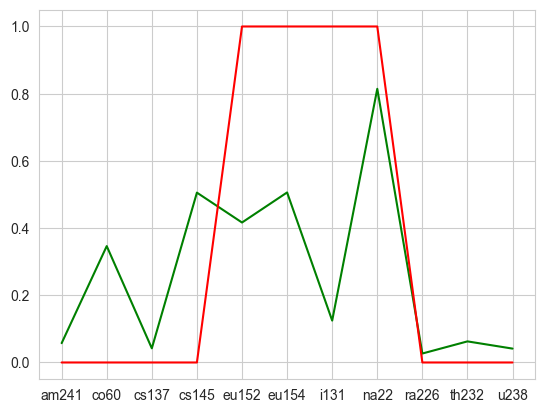

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

classes = training_obj.mlb.classes_
print(layer_outputs.keys())
print(training_obj.mlb.classes_)
print(simg_outsputs[0].detach().numpy())

# plt.plot(layer_outputs["fc2"][0])
plt.plot(training_obj.mlb.classes_, simg_outsputs[0].detach().numpy(), color="green")
plt.plot(training_obj.mlb.classes_, y_data[0], color="red")



In [132]:
keys = datetime
y_valid = i[2][4].to("cpu")
x_data = i[0][4].float().to("cpu").unsqueeze(0).unsqueeze(0)
x_sample.requires_grad = True
output = model(x_data)
probs = torch.sigmoid(output)
preds = (probs > 0.50).int()



TypeError: 'int' object is not subscriptable

In [163]:
feature_map = layer_outputs["conv3"]
result = np.abs(np.sum(feature_map, axis=1))
result[0]

array([4039.4087  , 2407.4836  , 1183.0283  , ...,   10.958214,
         10.958214,   10.958214], shape=(2033,), dtype=float32)

tensor([[0.0256, 0.4807, 0.0235, 0.5218, 0.3876, 0.4387, 0.0806, 0.8952, 0.0159,
         0.0326, 0.0166]], grad_fn=<SigmoidBackward0>) tensor([[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]]) 2020-09-23 15:25:25 ['am241' 'co60' 'cs137' 'cs145' 'eu152' 'eu154' 'i131' 'na22' 'ra226'
 'th232' 'u238']


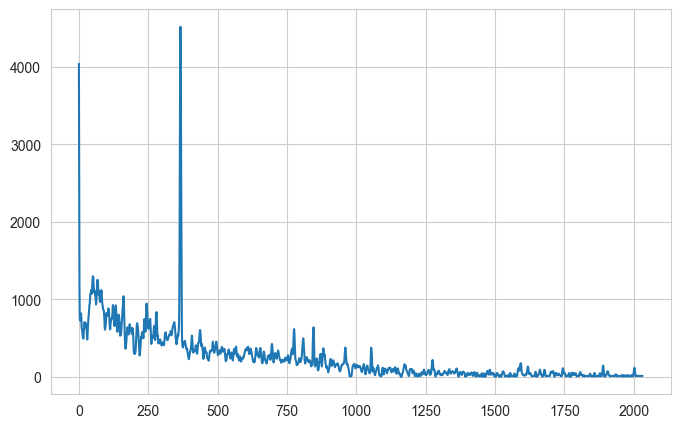

In [164]:

processed = []

gray_scale = sum(feature_map)

print(probs, y_valid, datetime, classes)
fig = plt.figure(figsize=(8, 5))
imgplot = plt.plot(result[0])



array([[[ 0.4034796 ,  0.4203423 ,  0.52392894, ...,  0.39950138,
          0.39950138,  0.39950138],
        [-0.0242646 , -0.04776863, -0.20033008, ..., -0.01846503,
         -0.01846503, -0.01846503],
        [ 0.1467756 ,  0.13504757,  0.07037178, ...,  0.1493157 ,
          0.1493157 ,  0.1493157 ],
        ...,
        [-0.41344887, -0.38842025, -0.23891786, ..., -0.41949335,
         -0.41949335, -0.41949335],
        [-0.14937094, -0.1711488 , -0.30641046, ..., -0.14413856,
         -0.14413856, -0.14413856],
        [-0.31341562, -0.29817906, -0.19923568, ..., -0.31698093,
         -0.31698093, -0.31698093]]], shape=(1, 1020, 8156), dtype=float32)

C:\Users\VID\AppData\Local\Temp\ipykernel_18216\1180053276.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", len(classes))  # Use tab10 for up to 10 distinct colors
C:\Users\VID\AppData\Local\Temp\ipykernel_18216\1180053276.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


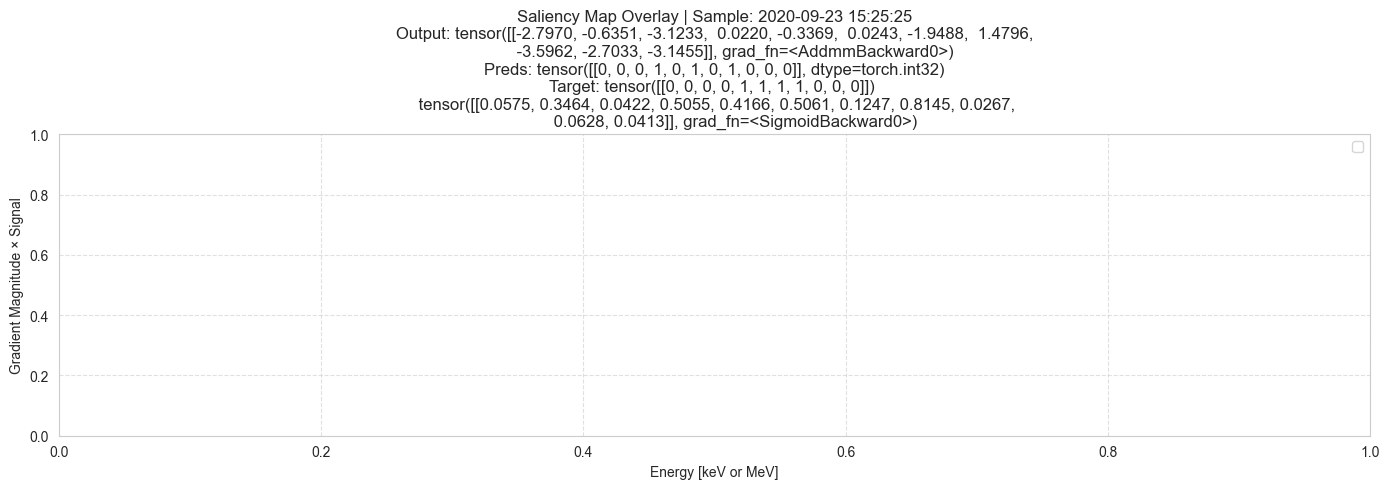

In [35]:

plt.figure(figsize=(14, 5))
color_map = plt.cm.get_cmap("tab10", len(classes))  # Use tab10 for up to 10 distinct colors
energy_max = 0.34507313512321336 * 8160
energy_axis = np.arange(0, energy_max, 0.34507313512321336)
for classe in range(len(classes)):
    score = output[0, classe]
    model.zero_grad()
    if x_sample.grad is not None:
        x_sample.grad.zero_()
    score.backward(retain_graph=True)

    if x_sample.grad is not None:
        saliency = x_sample.grad.abs().cpu().numpy() * x_sample.detach().cpu().numpy()
        # saliency = x_sample.grad.abs().cpu().numpy()
        print(saliency)
        plt.plot(energy_axis, saliency, label=f"Class {classe}", linewidth=1.5, color=color_map(classe))
    else:
        pass

# Add the original sample spectrum
# plt.plot(energy_axis, x_sample.detach().cpu().numpy(), label="Input Spectrum", color='black', linestyle='--', zorder=0)
# plt.yscale('log')
# plt.ylim(0,0.025)
plt.title(f"Saliency Map Overlay | Sample: {keys}\nOutput: {output}\nPreds: {preds}\nTarget: {y_valid} \n {probs}")
plt.xlabel("Energy [keV or MeV]")
plt.ylabel("Gradient Magnitude × Signal")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()